# Classifying Images of flowers using CNNs

## Importing Packages

In [1]:
import os # This is used to read files and directory structure
import numpy as np # This is used for converting python lists into numpy arrays and performing matrix operations
import glob # This module finds all the pathnames matching a specified pattern 
import shutil # The shutil module helps you automate copying files and directories
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt



## Load Data

We download and store an archived version of the dataset in a temporary directory

In [2]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos') # Join one or more path components intelligently

## Creating Classes 

In [3]:
# ----> The dataset we just downloaded contains images of 5 types of flowers 
# ----> Rose , Daisy , Dandelion , Sunflowers , Tulips

classes = ['roses','daisy','dandelion','sunflowers','tulips'] # these are labels for each class

## Locating FilePath to find Validation and Training data sets 

In [21]:
#-----> This locates the file path of data sets
#-----> checks to see if there are training , testing , validation data sets contained in the folder

Flower_base_dir = os.path.dirname(base_dir)
!find $Flower_base_dir -type d -print

/Users/apple/.keras/datasets
/Users/apple/.keras/datasets/cats_and_dogs_filtered
/Users/apple/.keras/datasets/cats_and_dogs_filtered/train
/Users/apple/.keras/datasets/cats_and_dogs_filtered/train/dogs
/Users/apple/.keras/datasets/cats_and_dogs_filtered/train/cats
/Users/apple/.keras/datasets/cats_and_dogs_filtered/validation
/Users/apple/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/Users/apple/.keras/datasets/cats_and_dogs_filtered/validation/cats
/Users/apple/.keras/datasets/fashion-mnist
/Users/apple/.keras/datasets/flower_photos
/Users/apple/.keras/datasets/flower_photos/roses
/Users/apple/.keras/datasets/flower_photos/sunflowers
/Users/apple/.keras/datasets/flower_photos/daisy
/Users/apple/.keras/datasets/flower_photos/train
/Users/apple/.keras/datasets/flower_photos/train/roses
/Users/apple/.keras/datasets/flower_photos/train/sunflowers
/Users/apple/.keras/datasets/flower_photos/train/daisy
/Users/apple/.keras/datasets/flower_photos/train/dandelion
/Users/apple/.keras/

As you can see there are no folders containing training and validation data.
Therefore, we will have to create our own training and validation set

## Creating Training and Validation data sets 

In [5]:
# for cl in classes:
 # img_path = os.path.join(base_dir, cl)
 # images = glob.glob(img_path + '/*.jpg') # finds all files with the same file extensions
  # print("{}: {} Images".format(cl, len(images)))
# train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

    # This creates creates a training and Validation folder and moves files into them
    # It then creates directories fo them
  #for t in train:
    # if not os.path.exists(os.path.join(base_dir, 'train', cl)): # used to check whether the specified path exists or not
     # os.makedirs(os.path.join(base_dir, 'train', cl)) # is recursive directory creation function
    # shutil.move(t, os.path.join(base_dir, 'train', cl)) #Recursively moves a file or directory (source) to another location (destination) and returns the destination

  # for v in val:
   # if not os.path.exists(os.path.join(base_dir, 'val', cl)):
    #  os.makedirs(os.path.join(base_dir, 'val', cl))
   # shutil.move(v, os.path.join(base_dir, 'val', cl))  

In [6]:
# We now set up a directory for our training and validation data sets
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Data Augmentation 

Overfitting generally occurs when we have small number of training examples. 
One way to fix this problem is to augment our dataset so that it has sufficient number of training examples.
Data augmentation takes the approach of generating more training data from existing training samples. 
by augmenting the samples via a number of random transformations that yield believable-looking images.
---> The goal is that at training time, your model will never see the exact same picture twice.
---> This helps expose the model to more aspects of the data and generalize better.
We will be using the ImageDataGeneartor class to transform our images by passing different transformations.




In [7]:
# SET BATCH AND IMAGE SIZE
batch_size = 100
IMG_SHAPE = 150

In [8]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


### Horizontal Flip 

In [9]:
# -We begin with a horizontal flip
# - This is achieved by passing horizontal_flip=True as an argument to the ImageDataGenerator class.
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


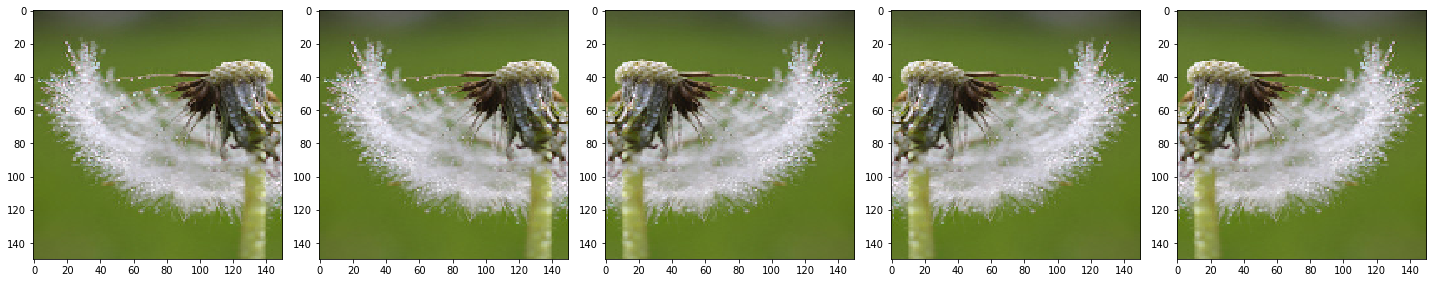

In [10]:
#Check Flip
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Random Rotation 

In [11]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


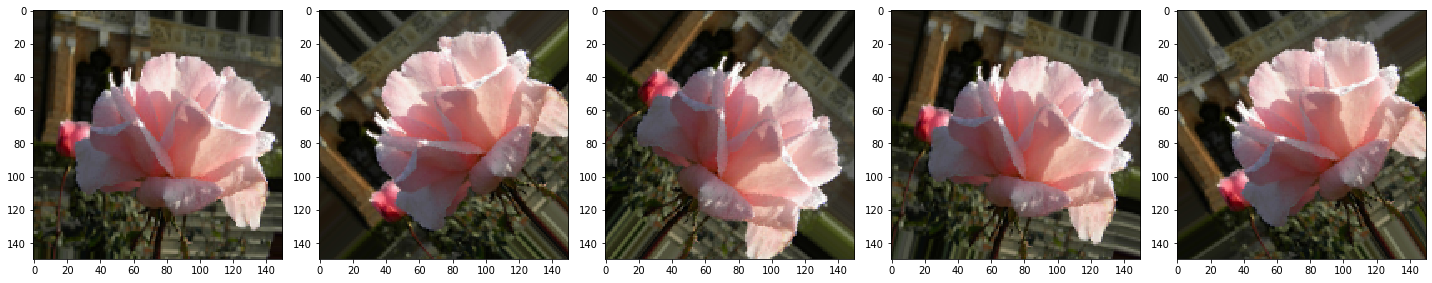

In [12]:
# Check Rotation
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Random Zoom 

In [13]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


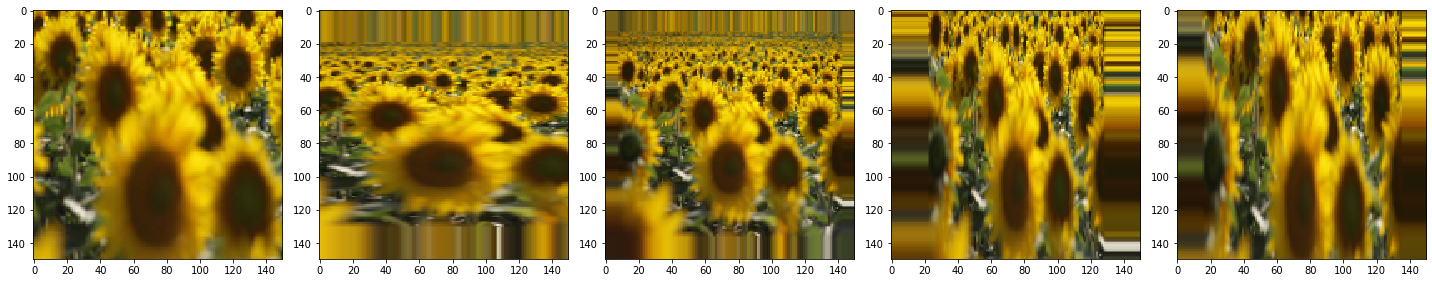

In [14]:
# Check Zoom
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# Now All Together

In [15]:
# This is simplified version of all the augmentations we did above 
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.15,
      height_shift_range=0.15,
      zoom_range=0.5,
      horizontal_flip=True,
     )

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='sparse')

Found 2935 images belonging to 5 classes.


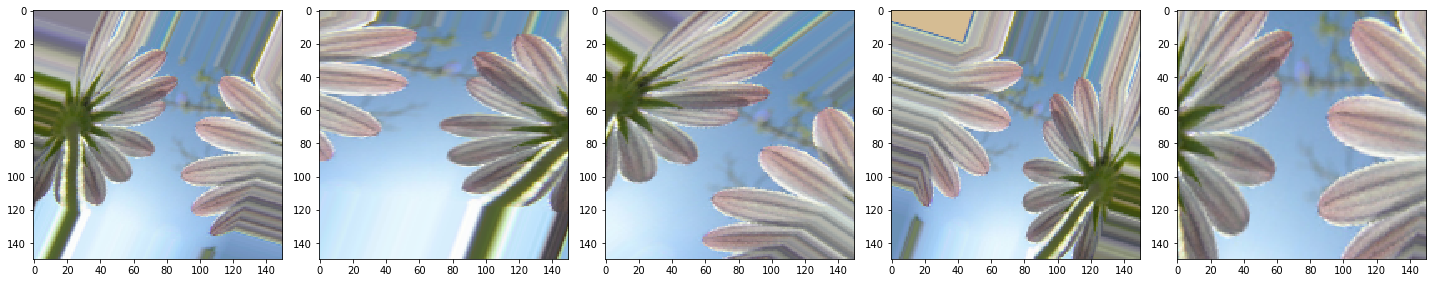

In [16]:
# Sample check ( lets visualize it)
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Create a Data Generator for the Validation Set 

In [17]:
# Generally, we only apply data augmentation to our training examples
# So for our validation set , we only apply rescaling
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                  class_mode='binary')
                                                               


Found 735 images belonging to 5 classes.


# Create the CNN Model

In [18]:
#We create 3 convolutional blocks .
#Each containing a Conv2D layer followed by a max pool layer
#1st layer should have 16 Filters
#2nd layer should have 32 Filters
#3rd Layer should have 64 Filters
#All filters should be 3x3 
#All max pool layers should be 2x2
#Layers must be flattened towards the end
#End with a fully connected layer of 512 Units
#We shall use a softmax activation function  for the output(5)
#All other layers will use a relu function
#Let us also add a dropout layer with probability of 20%

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5)
])


# Compile the Model 

In [19]:
# We shal use the ADAM optimizer
# We shall use the SparseCategoricalCrossentropy as a loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the Model

In [20]:
# over here, we use the fit_generator function instaed of the usyual fit function because of our ImageDataGenerator class
epochs = 100

history = model.fit_generator(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 30 steps, validate for 8 steps
Epoch 1/100
30/30 [==============================] - 60s 2s/step - loss: 1.5719 - accuracy: 0.2951 - val_loss: 1.2466 - val_accuracy: 0.4653
Epoch 2/100
30/30 [==============================] - 61s 2s/step - loss: 1.1836 - accuracy: 0.4940 - val_loss: 1.0746 - val_accuracy: 0.5932
Epoch 3/100
30/30 [==============================] - 60s 2s/step - loss: 1.0660 - accuracy: 0.5717 - val_loss: 0.9921 - val_accuracy: 0.6272
Epoch 4/100
30/30 [==============================] - 59s 2s/step - loss: 0.9825 - accuracy: 0.6157 - val_loss: 0.9635 - val_accuracy: 0.6299
Epoch 5/100
30/30 [==============================] - 60s 2s/step - loss: 0.9548 - accuracy: 0.6215 - val_loss: 1.0035 - val_accuracy: 0.6395
Epoch 6/100
30/30 [==============================] - 59s 2s/step - loss: 0.9245 - accuracy: 0.6429 - val_loss: 0.9512 - val_accu

30/30 [==============================] - 60s 2s/step - loss: 0.4865 - accuracy: 0.8239 - val_loss: 0.7015 - val_accuracy: 0.7728
Epoch 56/100
30/30 [==============================] - 59s 2s/step - loss: 0.4625 - accuracy: 0.8249 - val_loss: 0.7560 - val_accuracy: 0.7497
Epoch 57/100
30/30 [==============================] - 59s 2s/step - loss: 0.4772 - accuracy: 0.8187 - val_loss: 0.7043 - val_accuracy: 0.7592
Epoch 58/100
30/30 [==============================] - 59s 2s/step - loss: 0.4552 - accuracy: 0.8160 - val_loss: 0.7101 - val_accuracy: 0.7714
Epoch 59/100
30/30 [==============================] - 59s 2s/step - loss: 0.4661 - accuracy: 0.8198 - val_loss: 0.7019 - val_accuracy: 0.7864
Epoch 60/100
30/30 [==============================] - 59s 2s/step - loss: 0.4387 - accuracy: 0.8245 - val_loss: 0.7117 - val_accuracy: 0.7646
Epoch 61/100
30/30 [==============================] - 59s 2s/step - loss: 0.4359 - accuracy: 0.8290 - val_loss: 0.7679 - val_accuracy: 0.7565
Epoch 62/100
30/30 

## Plot Training and Validation Graphs

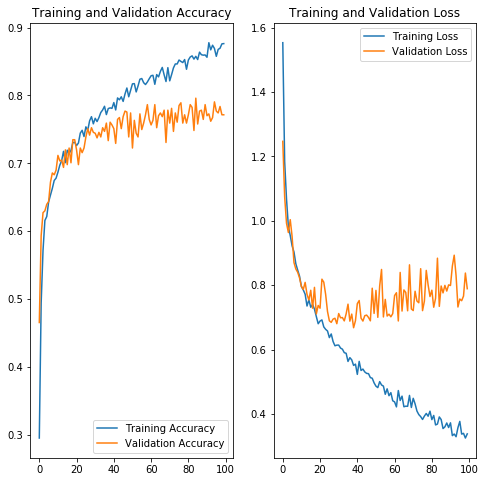

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Use trained model 